## Preprocesamiento de Datos y PCA

## Objetivos

1. Conocer el concepto de preprocesamiento de datos.
2. Identificar y tratar outliers.
3. Comprender la importancia de graficar los datos.
4. Introducir el análisis de datos ausentes.
5. Incorporar las componentes principales.

In [4]:
# Importación de Librerias básica:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocesado y modelado:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Visualización:
import matplotlib.style as style
style.use('seaborn')

C:\Users\andre\AppData\Local\Temp\ipykernel_3352\2836702207.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


## 1. Outliers


Hay casos donde algunos valores están “demasiado” alejados de la masa de datos central. Esto puede ser indicador de alguna situación anómala, o bien puede ser simplemente un dato mal cargado. En todos los casos es conveniente identificar estos datos extremos, a los que denominamos valores anómalos u outliers, y tomar acciones en consecuencia a partir de su detección.

### 1.1. Outliers en más de una dimensión

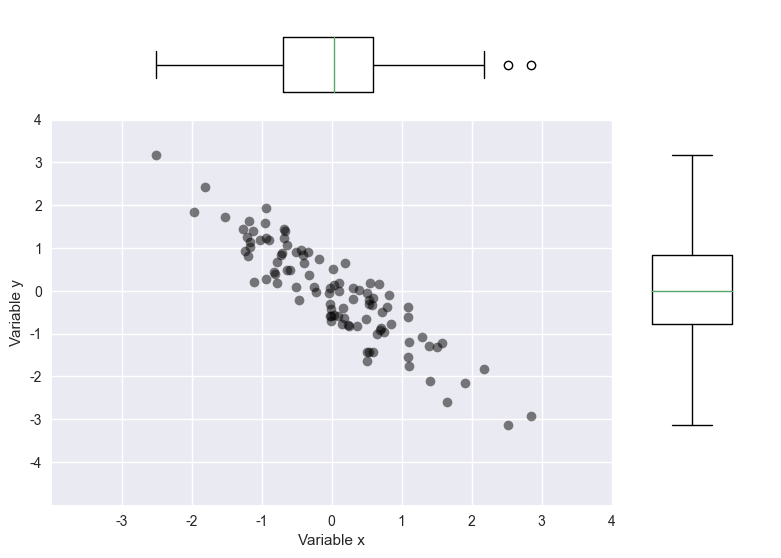

In [5]:
# Semilla aleatoria:
np.random.seed(153) 

# Generamos 100 números aleatorios de una distribución normal estándar:
x_data = np.random.randn(100)
# Generamos 100 números aleatorios de una distribución normal con media igual a '-x_data' y desviación estándar igual a 0.5:
y_data = -x_data + np.random.randn(100)*0.5

# Creamos un DataFrame con la información generada:
df = pd.DataFrame()
df['vcnt'] = x_data
df['ecnt'] = y_data

# Definimos las coordenadas para los ejes del scatter plot y los boxplots:
left = 0.1
bottom = 0.1
top = 0.8
right = 0.8
main_ax = plt.axes([left, bottom, right-left, top-bottom])          # Eje principal para el scatter plot.

# Creamos los ejes en la parte superior derecha de los ejes principales y los ocultamos:
# Luego, creamos el eje superior para el boxplot de la variable 'vcnt'.
top_ax = plt.axes([left, top, right - left, 1-top])
plt.axis('off')
right_ax = plt.axes([right,bottom, 1-right, top-bottom])
plt.axis('off')
main_ax.plot(df['vcnt'], df['ecnt'], 'ko', alpha=0.5)

tcksx = main_ax.get_xticks()            # Guardamos las marcas en el eje x del scatter plot.
tcksy = main_ax.get_yticks()            # Guardamos las marcas en el eje y del scatter plot.

# Dibujamos el boxplot de la variable 'ecnt' en el eje derecho:
right_ax.boxplot(df['ecnt'], positions=[0], notch=False, widths=1.)
top_ax.boxplot(df['vcnt'], positions=[0], vert=False, notch=False, widths=1.)       # Luego, en el eje superior.

# Establemos las marcas en el eje y del scatter plot:
main_ax.set_yticks(tcksy)               # pos = tcksy
# Luego, en el eje x del scatter plot:
main_ax.set_xticks(tcksx)               # pos = tcksx
# Establecemos las etiquetas en el eje y y x correspondientes:
main_ax.set_yticklabels([int(j) for j in tcksy])
main_ax.set_xticklabels([int(j) for j in tcksx])

# Establecemos los límites del eje y del gráfico principal utilizando los valores 
# mínimos y máximos de la lista de valores del eje y (tcksy). Restamos 1 a cada valor de la lista tcksy y 
# tomamos el valor mínimo resultante:
main_ax.set_ylim([min(tcksy-1), max(tcksy)])
# Procedemos de la misma forma con el eje x:
main_ax.set_xlim([min(tcksx-1), max(tcksx)])
# Establecemos las etiquetas de los ejes x e y, respectivamente, del gráfico principal:
main_ax.set_xlabel('Variable x')
main_ax.set_ylabel('Variable y')

# Establecemos los límites del eje x del boxplot utilizando los mismos límites que el gráfico principal
# (rango fijo de -1 a 1, que es el rango de los valores de la variable y):
top_ax.set_xlim(main_ax.get_xlim())
top_ax.set_ylim(-1,1)
# Realizamos el mismo procedimiento para el eje y:
right_ax.set_ylim(main_ax.get_ylim())
right_ax.set_xlim(-1,1)

# Finalmente, ploteamos:
plt.show()

## 2. Importancia de las gráficas (Cuarteto de Anscombe)

El cuarteto de Anscombe comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consta de once puntos (x, y). El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

[Cuarteto de Anscombe](https://es.wikipedia.org/wiki/Cuarteto_de_Anscombe)

In [6]:
raw_anscombe = "https://raw.githubusercontent.com/andrewhetherington/python-projects/master/Blog%E2%80%94Anscombe's%20Quartet/anscombes.csv"
anscombe = pd.read_csv(raw_anscombe)

anscombe.columns = anscombe.columns.str.split('_', expand=True)
anscombe.columns = anscombe.columns.swaplevel(1,0)

anscombe

I         II       III         IV       
     x      y   x     y   x      y   x      y
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

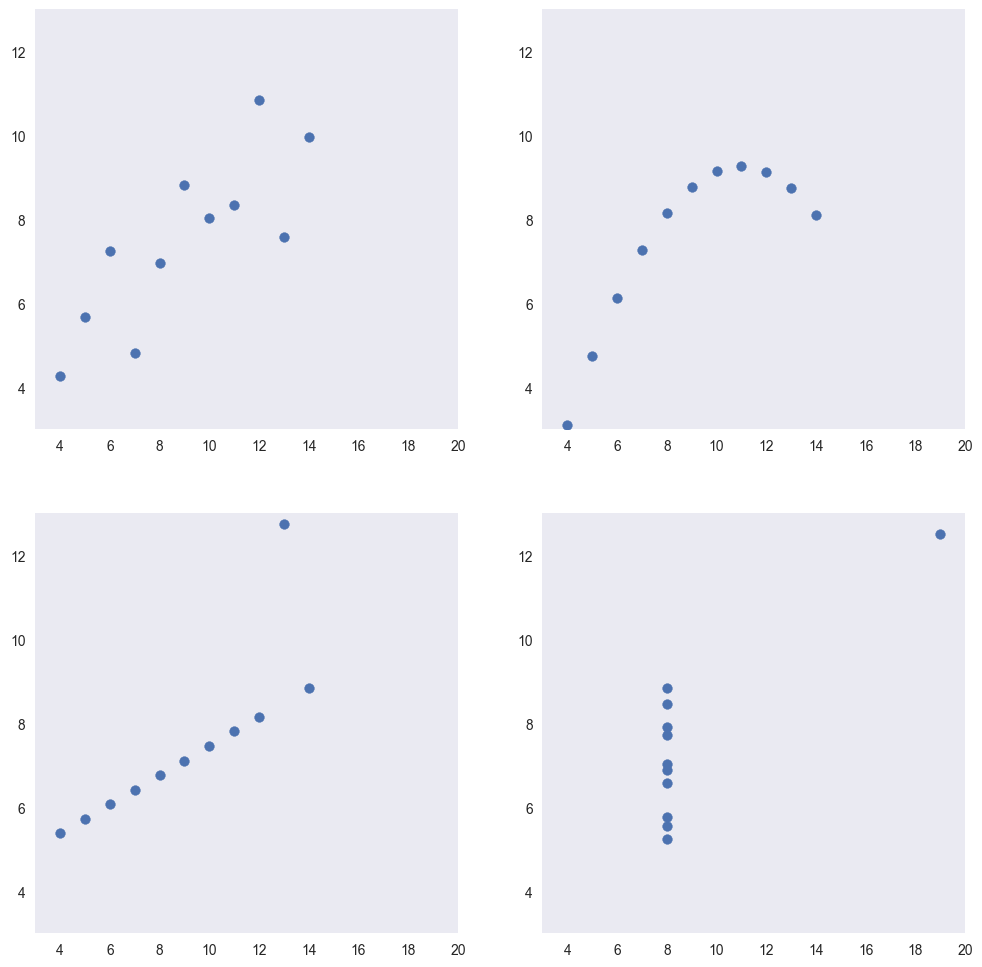

In [7]:
def plot_data(trendlines=False):

    # Establecemos el tamaño de la figura:
    fig = plt.figure(figsize=(12, 12))

    # --- Primera Gráfica ---
    # Agregamos la grilla de la primera gráfica al conjunto de imágenes:
    ax1 = fig.add_subplot(221)   # 221 representa 2row, 2col, 1position 
    # Graficamos los datos:
    ax1.scatter(anscombe["I"]["x"], anscombe["I"]["y"])
    # Agregamos el texto:
    ax1.text(x = 11.5, y = 4.5, s = "",
                fontsize = 300, alpha = .10, ha="center")
    # Establecemos los límites del eje x:
    ax1.set_xlim(3, 20)
    # Establecemos límites del eje y:
    ax1.set_ylim(3,13)
    # Quitamos las lineas de cuadrícula:
    ax1.grid(False)

    # --- Segunda Gráfica ---
    # Agregar la grilla de la primera gráfica al conjunto de imágenes:
    ax2 = fig.add_subplot(222)   # 221 representa 2row, 2col, 2posicion 
    # Graficamos los datos:
    ax2.scatter(anscombe["II"]["x"], anscombe["II"]["y"])
    # Agregamos el texto:
    ax2.text(x=11.5, y = 4.5, s = "",
                fontsize = 300, alpha = .10, ha="center")
    # Establecemos los límites del eje x:
    ax2.set_xlim(3, 20)
    # Establecemos límites del eje y:
    ax2.set_ylim(3, 13)
    # Quitamos las lineas de cuadrícula:
    ax2.grid(False)

    # --- Tercera Gráfica ---
    # Añadimos otra subgráfica en la tercera posición:
    ax3 = fig.add_subplot(223)
    # Graficamos los datos:
    ax3.scatter(anscombe["III"]["x"], anscombe["III"]["y"])
    # Agregamos el texto:
    ax3.text(x=11.5, y = 4.5, s = "",
                fontsize = 300, alpha = .10, ha="center")
    # Agregamos los límites de los ejes x e y, quitamos las lineas de cuadriculas:
    ax3.set_xlim(3, 20)
    ax3.set_ylim(3, 13)
    ax3.grid(False)

    # --- Cuarta Gráfica ---
    # Añadimos la cuarta y última subgráfica en la cuarta posición:
    ax4 = fig.add_subplot(224)
    # Graficamos los datos:
    ax4.scatter(anscombe["IV"]["x"], anscombe["IV"]["y"])
    # Agregamos el texto:
    ax4.text(x=11.5, y = 4.5, s = "",
            fontsize = 300, alpha = .10, ha="center")
    # Finalmente, agregamos los límites de los ejes x e y, quitamos las lineas de cuadriculas:
    ax4.set_xlim(3,20)
    ax4.set_ylim(3,13)
    ax4.grid(False)
    
plot_data()
plt.savefig("anscombe_plotted")